In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import cv2
from tensorflow.keras import datasets, layers, models

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

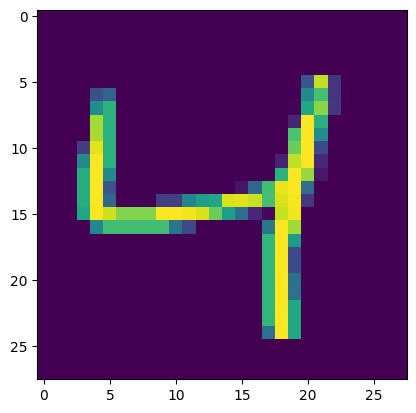

In [7]:
plt.imshow(X_train[2])

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0

In [9]:
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(96, (5, 5), activation='relu', input_shape=(28,28,1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(96, (5, 5), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(80, (5, 5), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(layers.Conv2D(96, (5, 5), activation='relu', padding='same'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 96)        2496      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 96)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 96)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 96)        230496    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 96)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 96)          0

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 96)        2496      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 96)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 96)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 96)        230496    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 96)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 96)          0

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
469/469 [==============================] - 18s 23ms/step - loss: 0.3022 - accuracy: 0.8968 - val_loss: 0.0532 - val_accuracy: 0.9830
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0664 - accuracy: 0.9794 - val_loss: 0.0321 - val_accuracy: 0.9900
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0516 - accuracy: 0.9837 - val_loss: 0.0293 - val_accuracy: 0.9909
Epoch 4/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0420 - accuracy: 0.9875 - val_loss: 0.0247 - val_accuracy: 0.9921
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0366 - accuracy: 0.9884 - val_loss: 0.0284 - val_accuracy: 0.9917
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0326 - accuracy: 0.9898 - val_loss: 0.0223 - val_accuracy: 0.9921
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0311 - accuracy: 0.9906 - val_loss: 0.0262 - val_accuracy: 0.992

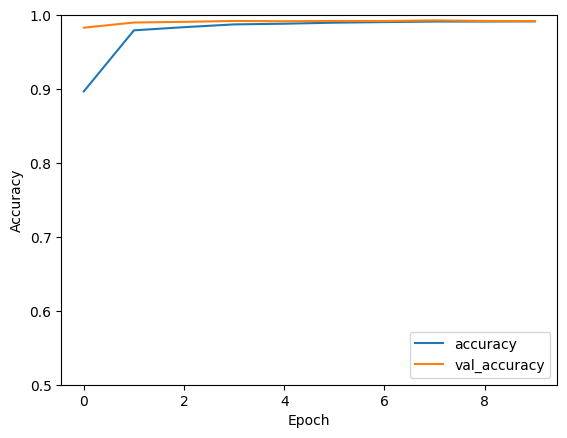

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [17]:
y_pred_probabilities = model.predict(X_test_reshaped)
y_pred = np.argmax(y_pred_probabilities, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix:
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1134    0    0    0    1    0    0    0    0]
 [   0    1 1022    4    0    0    0    2    3    0]
 [   0    0    0 1009    0    1    0    0    0    0]
 [   0    1    0    0  955    0    1    1    0   24]
 [   1    0    0    4    0  885    1    0    1    0]
 [   2    2    0    1    1    1  950    0    1    0]
 [   0    5    1    0    0    0    0 1020    0    2]
 [   0    0    0    1    0    2    0    0  968    3]
 [   0    0    1    2    1    1    0    5    1  998]]


In [19]:
def image_classifier(path):
  image_path = path
  image = cv2.imread(image_path)

  resized_image = cv2.resize(image, (28, 28))
  gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
  normalized_image = gray_image / 255.0

  input_image = normalized_image.reshape(1, 28, 28, 1)

  predicted_probabilities = model.predict(input_image)
  predicted_class = np.argmax(predicted_probabilities)

  print("Predicted Class:", predicted_class)


In [24]:
image_classifier("/content/5.jpeg")

1/1 [==============================] - 0s 38ms/step
Predicted Class: 5
